In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm

In [2]:
#đọc file
df= pd.read_csv('C:\\Users\\acer\\Downloads\\Diet_R.csv.csv')
df.sample(10)

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
23,34,0.0,54,173,63,2,59.4
54,24,1.0,40,190,88,1,84.5
45,15,1.0,39,168,71,1,71.6
15,14,0.0,37,167,82,1,81.1
29,40,0.0,29,169,77,2,77.5
40,62,0.0,31,170,72,3,71.1
32,54,0.0,21,159,64,3,60.6
68,69,1.0,29,166,76,3,72.5
62,48,1.0,40,171,79,2,72.9
64,50,1.0,39,180,80,2,81.4


Tính cân nặng giảm

In [3]:
df['losingweight'] = df['pre.weight'] - df['weight6weeks']
df_diet_losing = df[['Diet','losingweight']].copy()
df_diet_losing

,Diet,losingweight
0,2,0.0
1,2,0.0
2,1,3.8
3,1,6.0
4,1,0.7
...,...,...
73,3,2.8
74,3,4.1
75,3,5.3
76,3,9.2


#### Sự khác nhau về hiệu quả của các phương pháp giảm cân
##### Phát biểu giả thuyết

- H0: không có sự khác biệt về hiệu quả giảm cân giữa 3 phương pháp
    
- H1: có ít nhất hai kiểu phương pháp khác nhau về hiệu quả giảm cân

In [4]:
stat, p_value = stats.ttest_ind(df["pre.weight"], df["weight6weeks"])
print('Stat =', stat, 'P_value =', p_value)
if p_value < 0.05:
    print('''Có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý rằng
          có sự thay đổi về cân nặng trước và sau khi giảm cân''')
else:
    print('''Chưa có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý rằng
    không có sự thay đổi về cân nặng trước và sau khi giảm cân''')

Stat = 2.720972750635475 P_value = 0.0072584136689251115
Có bằng chứng thống kê để bác bỏ giả thuyết H0. Điều này ngụ ý rằng
          có sự thay đổi về cân nặng trước và sau khi giảm cân


Text(0.5, 1.0, 'Cân nặng trước và sau khi giảm cân')

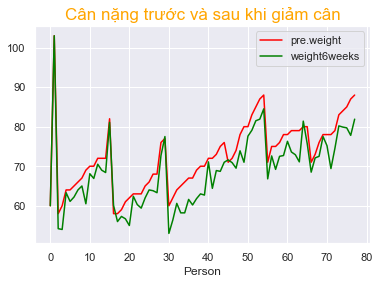

In [10]:
sns.set()
df[['pre.weight', 'weight6weeks']].plot(color = ['red', 'green'])
plt.xlabel('Person')
plt.title('Cân nặng trước và sau khi giảm cân', fontsize = 17, color = 'orange')


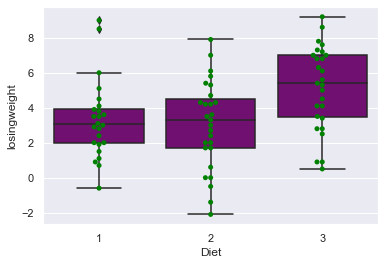

In [24]:
sns.boxplot(x='Diet',y='losingweight',data = df_diet_losing, color='purple')
sns.swarmplot(x='Diet',y='losingweight', data = df_diet_losing, color='green')
plt.show()

In [26]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [27]:
model = ols('losingweight ~ C(Diet)', data=df_diet_losing).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Diet),71.093689,2.0,6.197447,0.003229
Residual,430.179259,75.0,NaN,NaN


In [28]:
def results(p, alpha=0.05):
    cols=['f_score', 'p_value', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    return df[cols]

In [29]:
p = {}
p['f_score'] = anova_table['F'][0]
p['p_value'] = anova_table['PR(>F)'][0]
results(p)

,f_score,p_value,KetLuan
,6.197447,0.003229,Chấp nhận H1 với mức ý nghĩa 0.05


#### Kiểm tra hậu nghiệm

In [43]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=df_diet_losing['losingweight'],
                         groups=df_diet_losing['Diet'],
                         alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-0.2741,0.9,-1.8806,1.3325,False
1,3,1.8481,0.0201,0.2416,3.4547,True
2,3,2.1222,0.0048,0.5636,3.6808,True


#### Kiểm tra các điều kiện cho kiểm định Anova

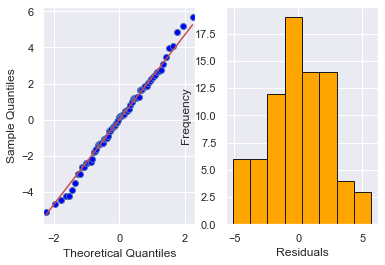

In [36]:
fig, ax = plt.subplots(1,2)
sm.qqplot(model.resid,line='s', ax=ax[0])
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Residuals")

plt.hist(model.resid, bins='auto', histtype='bar', ec='k', color= 'orange')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [37]:
p_v = stats.shapiro(model.resid)[1]

##### Kiểm tra phân phối chuẩn

In [51]:
print('''Phát biểu giả thiết thống kê:
    H0: Mẫu tuân theo phân phối chuẩn
    H1: Mẫu khống tuân theo phân phối chuẩn''')
if p_v > 0.05:
    print(f'Không có bằng chứng thống kê để bác bỏ giả thiết H0. Điều này ngụ ý Mẫu tuân theo phân phối chuẩn')
else:
    print(f'Có bằng chứng thống kê để bác bỏ giả thiết H0. Điều này ngụ ý Mẫu không tuân theo phân phối chuẩn (H1)')

Phát biểu giả thiết thống kê:
    H0: Mẫu tuân theo phân phối chuẩn
    H1: Mẫu khống tuân theo phân phối chuẩn
Không có bằng chứng thống kê để bác bỏ giả thiết H0. Điều này ngụ ý Mẫu tuân theo phân phối chuẩn


In [44]:
#gender = 0: nữ, gender = 1: nam
df_gen_losingweight = df[['gender','losingweight']].copy()
df_gen_losingweight = df_gen_losingweight.replace(r'^\s*$', np.nan, regex=True)
df_gen_losingweight = df_gen_losingweight.dropna()
df_gen_losingweight

,gender,losingweight
2,0.0,3.8
3,0.0,6.0
4,0.0,0.7
5,0.0,2.9
6,0.0,2.8
...,...,...
73,1.0,2.8
74,1.0,4.1
75,1.0,5.3
76,1.0,9.2


#### SỰ KHÁC NHAU VỀ HIỆU QUẢ GIẢM CÂN VỚI CÁC GIỚI TÍNH KHÁC NHAU

##### Phát biểu giả thuyết
- H0: không có sự khác biệt về hiệu quả giảm cân đối với các giới tính khác nhau
- H1: Các giới khác nhau về hiệu quả giảm cân

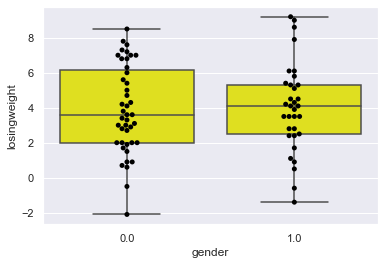

In [46]:
sns.boxplot(x='gender',y='losingweight',data = df_gen_losingweight, color='yellow')
sns.swarmplot(x='gender',y='losingweight', data = df_gen_losingweight, color='black')
plt.show()

In [47]:
model_2 = ols('losingweight ~ C(gender)', data=df_gen_losingweight).fit()
anova_table = sm.stats.anova_lm(model_2, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(gender),0.278485,1.0,0.043786,0.834827
Residual,470.650331,74.0,NaN,NaN


In [48]:
p = {}
p['f_score'] = anova_table['F'][0]
p['p_value'] = anova_table['PR(>F)'][0]
results(p)

,f_score,p_value,KetLuan
,0.043786,0.834827,Chấp nhận H0 với mức ý nghĩa 0.05


##### Kiểm tra các điều kiện cho kiểm định Anova

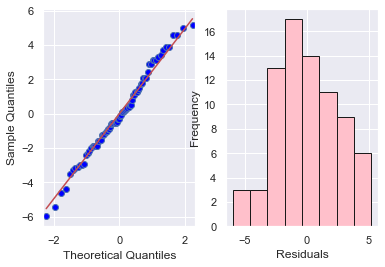

In [50]:
fig, ax = plt.subplots(1,2)
sm.qqplot(model_2.resid,line='s', ax=ax[0])
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Residuals")

plt.hist(model_2.resid, bins='auto', histtype='bar', ec='k', color='pink')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [ ]:
p_v = stats.shapiro(model_2.resid)[1]

In [52]:
print('''Phát biểu giả thiết thống kê:
    H0: Mẫu tuân theo phân phối chuẩn
    H1: Mẫu khống tuân theo phân phối chuẩn''')
if p_v > 0.05:
    print(f'Không có bằng chứng thống kê để bác bỏ giả thiết H0. Điều này ngụ ý Mẫu tuân theo phân phối chuẩn')
else:
    print(f'Có bằng chứng thống kê để bác bỏ giả thiết H0. Điều này ngụ ý Mẫu không tuân theo phân phối chuẩn (H1)')

Phát biểu giả thiết thống kê:
    H0: Mẫu tuân theo phân phối chuẩn
    H1: Mẫu khống tuân theo phân phối chuẩn
Không có bằng chứng thống kê để bác bỏ giả thiết H0. Điều này ngụ ý Mẫu tuân theo phân phối chuẩn
